### Importing Libraries

In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [593]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm 

### Exploratory Data Analysis

Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [594]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/heart.xls')

In [595]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [596]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [597]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [598]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    165
0    138
Name: target, dtype: int64


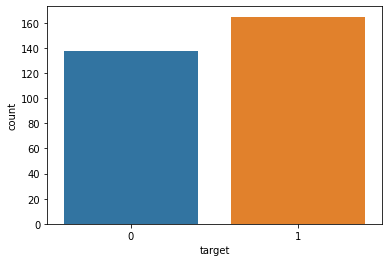

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [599]:
# checking the distribution of Target Variable
#1 --> Defective Heart
#0 --> Healthy Heart

print(df.target.value_counts())

sns.countplot(x="target", data=df)
plt.show()

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

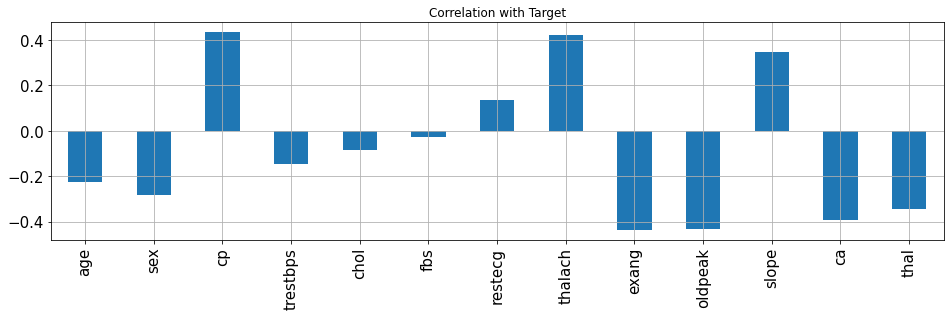

In [600]:
x = df.drop(columns='target', axis=1)
y = df['target']
#Correlation with Response Variable class
x.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Target", fontsize = 15,
        rot = 90, grid = True)

### Data Pre-Processing

Creating Dummy Variable:

Since 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' & 'thal' are categorical variables we'll turn them into dummy variables.

In [601]:
#Creating Dummy variables
a = pd.get_dummies(df['sex'], prefix = "sex")
b = pd.get_dummies(df['cp'], prefix = "cp")
c = pd.get_dummies(df['fbs'], prefix = "fbs")
d = pd.get_dummies(df['restecg'], prefix = "restecg")
e = pd.get_dummies(df['exang'], prefix = "exang")
f = pd.get_dummies(df['slope'], prefix = "slope")
g = pd.get_dummies(df['ca'], prefix = "ca")
h = pd.get_dummies(df['thal'], prefix = "thal")

In [602]:
#Adding the dummy variables to the dataset & dropping the previous columns:
frames = [df, a, b, c, d, e, f, g, h]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [603]:
#Scaling the non-categorical features:
sc=StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [604]:
df.shape

(303, 31)

In [605]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


Splitting the Features and Target

In [606]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [607]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [608]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [609]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2200)

In [610]:
print(X.shape, X_train.shape, X_test.shape)

(303, 30) (242, 30) (61, 30)


### Model Training

Logistic Regression from Scratch:

In [611]:
class Logistic_Regression():

  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    

  # fit function to train the model with dataset
  def fit(self, X, Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape
    

    #initiating weight & bias value
    self.w = np.zeros(self.n)    
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()
    

  def update_weights(self):
    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    

    # derivaties
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary
  def predict(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [612]:
#Training the Logistic Regression model with Training data
lro= Logistic_Regression(learning_rate=0.1 , no_of_iterations=1000)
lro.fit(X_train,Y_train)

In [613]:
#Accuracy on test data for Logistic Regression
prediction_lro = lro.predict(X_test)
test_data_accuracy_lro = accuracy_score(prediction_lro, Y_test)*100
print('Accuracy on Test data for Logistic Regression : {:} %'.format(test_data_accuracy_lro))

Accuracy on Test data for Logistic Regression : 90.1639344262295 %


Logistic Regression

In [614]:
#Training the Logistic Regression model with Training data
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [615]:
#Accuracy on test data for Logistic Regression
prediction_lr = lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(prediction_lr, Y_test)*100
print('Accuracy on Test data for Logistic Regression : {:} %'.format(test_data_accuracy_lr))

Accuracy on Test data for Logistic Regression : 90.1639344262295 %


K-Nearest Neighbour

Maximum KNN Score is 86.88524590163934%


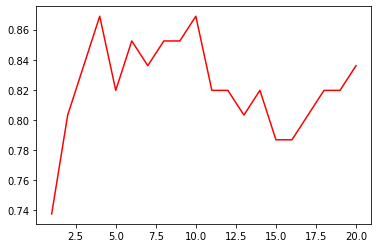

In [616]:
scoreList = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, Y_train)
    scoreList.append(knn.score(X_test, Y_test))
    
plt.plot(range(1,21), scoreList, color='red')

acc_knn = max(scoreList)*100
print("Maximum KNN Score is {:}%".format(acc_knn))

In [617]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
prediction_knn = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(prediction_knn, Y_test)*100
print('Accuracy on Test data for Logistic Regression : {:} %'.format(test_data_accuracy_knn))

Accuracy on Test data for Logistic Regression : 86.88524590163934 %


Naive-Bayes

In [618]:
#Training the Naive-Bayesian model with Training data
nb = GaussianNB()  
nb.fit(X_train, Y_train)  

GaussianNB()

In [619]:
#Accuracy on test data for Naive Bayes Classifier
prediction_nb = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(prediction_nb, Y_test)*100
print('Accuracy on Test data for Naive Bayes Classifier : {:} %'.format(test_data_accuracy_nb))

Accuracy on Test data for Naive Bayes Classifier : 83.60655737704919 %


SVM

In [620]:
#Training the SVM Classifier with Training data
from sklearn.svm import SVC
svmc = svm.SVC(kernel='linear') 
svmc.fit(X_train, Y_train)  

SVC(kernel='linear')

In [621]:
#Accuracy on test data for SVM
prediction_svmc = svmc.predict(X_test)
test_data_accuracy_svmc = accuracy_score(prediction_svmc, Y_test)*100
print('Accuracy on Test data for SVM : {:} %'.format(test_data_accuracy_svmc))

Accuracy on Test data for SVM : 81.9672131147541 %


### Comparison

In [622]:
#Classification Report Comparison

from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score 
from sklearn import metrics 

data = { 'LRO': prediction_lro, 'LR ': prediction_lr, 'KNN': prediction_knn, 'NB ': prediction_nb, 'SVC': prediction_svmc }

models = pd.DataFrame(data)

for column in models: 
  CM=confusion_matrix(Y_test,models[column])
  TN = CM[0][0]
  FN = CM[1][0]
  TP = CM[1][1]
  FP = CM[0][1]
  
  specificity = TN/(TN+FP)
  acc= accuracy_score(Y_test, models[column])
  roc=roc_auc_score(Y_test, models[column])
  prec = precision_score(Y_test, models[column])
  rec = recall_score(Y_test, models[column])
  f1 = f1_score(Y_test, models[column])
  
  t={'Model':column, 'Accuracy':acc,'Precision':prec, 'Sensitivity':rec,'Specificity':specificity, 'F1 Score':f1,'ROC':roc}
  print(t)

{'Model': 'LRO', 'Accuracy': 0.9016393442622951, 'Precision': 0.8857142857142857, 'Sensitivity': 0.9393939393939394, 'Specificity': 0.8571428571428571, 'F1 Score': 0.9117647058823529, 'ROC': 0.8982683982683983}
{'Model': 'LR ', 'Accuracy': 0.9016393442622951, 'Precision': 0.8857142857142857, 'Sensitivity': 0.9393939393939394, 'Specificity': 0.8571428571428571, 'F1 Score': 0.9117647058823529, 'ROC': 0.8982683982683983}
{'Model': 'KNN', 'Accuracy': 0.8688524590163934, 'Precision': 0.9310344827586207, 'Sensitivity': 0.8181818181818182, 'Specificity': 0.9285714285714286, 'F1 Score': 0.8709677419354839, 'ROC': 0.8733766233766235}
{'Model': 'NB ', 'Accuracy': 0.8360655737704918, 'Precision': 0.8108108108108109, 'Sensitivity': 0.9090909090909091, 'Specificity': 0.75, 'F1 Score': 0.8571428571428571, 'ROC': 0.8295454545454546}
{'Model': 'SVC', 'Accuracy': 0.819672131147541, 'Precision': 0.775, 'Sensitivity': 0.9393939393939394, 'Specificity': 0.6785714285714286, 'F1 Score': 0.8493150684931509, 

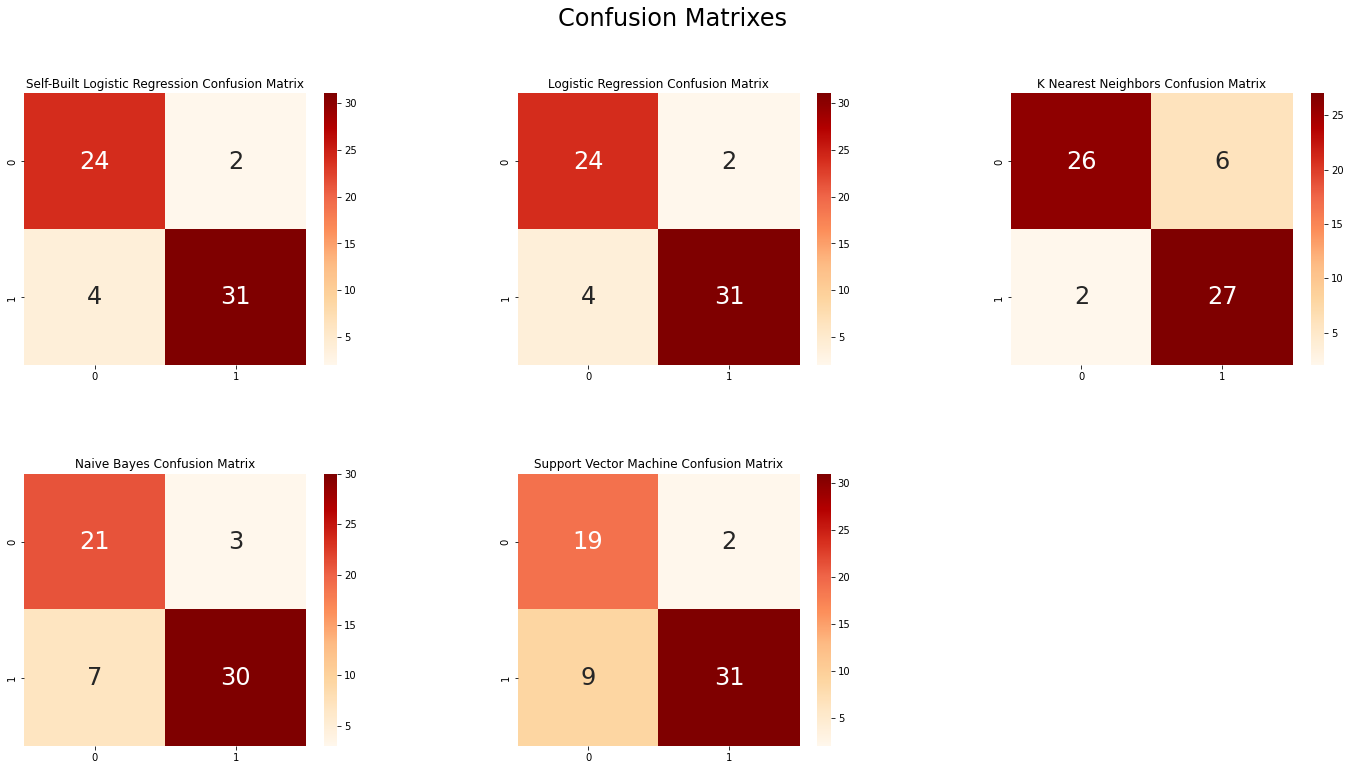

In [623]:
cmlro= confusion_matrix(prediction_lro, Y_test)
cmlr= confusion_matrix(prediction_lr, Y_test)
cmknn= confusion_matrix(prediction_knn, Y_test)
cmnb= confusion_matrix(prediction_nb, Y_test)
cmsvm= confusion_matrix(prediction_svmc, Y_test)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Self-Built Logistic Regression Confusion Matrix")
sns.heatmap(cmlro,annot=True,cmap="OrRd",cbar=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cmlr,annot=True,cmap="OrRd",cbar=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmknn,annot=True,cmap="OrRd",cbar=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cmnb,annot=True,cmap="OrRd",cbar=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cmsvm,annot=True,cmap="OrRd",cbar=True,fmt="d", annot_kws={"size": 24})

plt.show()

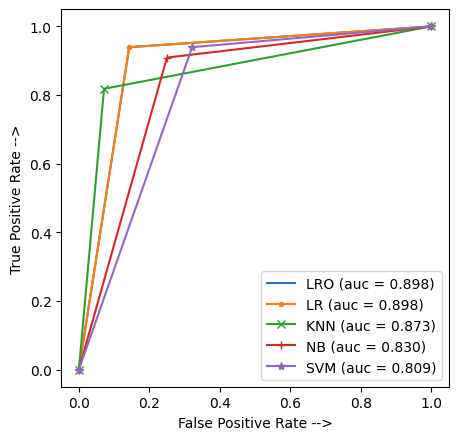

In [624]:
#ROC & AUC

from sklearn.metrics import roc_curve, auc

lro_fpr, lro_tpr, threshold = roc_curve(Y_test, prediction_lro)
auc_lro = auc(lro_fpr, lro_tpr)

lr_fpr, lr_tpr, threshold = roc_curve(Y_test, prediction_lr)
auc_lr = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(Y_test, prediction_knn)
auc_knn = auc(knn_fpr, knn_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(Y_test, prediction_nb)
auc_nb = auc(nb_fpr, nb_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(Y_test, prediction_svmc)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lro_fpr, lro_tpr, linestyle='-', label='LRO (auc = %0.3f)' % auc_lro)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (auc = %0.3f)' % auc_lr)
plt.plot(knn_fpr, knn_tpr, marker='x', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(nb_fpr, nb_tpr, marker='+', label='NB (auc = %0.3f)' % auc_nb)
plt.plot(svm_fpr, svm_tpr, marker='*', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()